In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import math
plt.style.use('ggplot')
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [ ]:
shidu=pd.read_excel('土壤湿度2012-2022各月份.xls')
weather=pd.read_excel('weather.xlsx')

In [ ]:
shidu.columns

In [ ]:
weather.columns

-0.07521564507442931


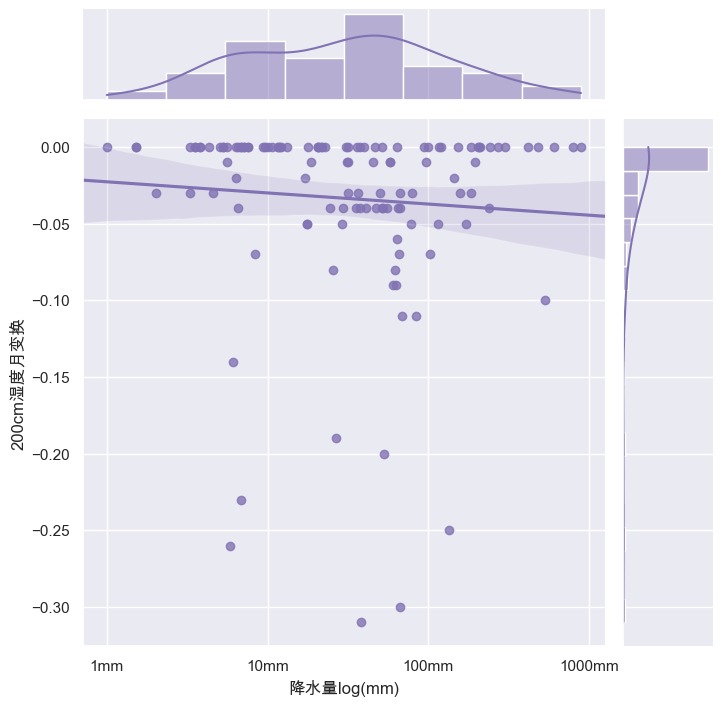

In [90]:
# box cox变换 
jiangshui=[math.log10(i+1) for i in weather.iloc[:123,14]]

lie=-1
deltashidu=[shidu.iloc[i+1,lie] -shidu.iloc[i,lie]  for i in range(122)]
la=['10cm湿度月变化','40cm湿度月变化','100cm湿度月变化','200cm湿度月变换']
sns.jointplot(x=jiangshui[1:123], y=deltashidu,
                  kind="reg", truncate=False,
                  color="m", height=7)
plt.ylabel(la[lie+4])
plt.xticks(range(4),['1mm','10mm','100mm','1000mm'])
plt.xlabel('降水量log(mm)')
print(pd.Series(jiangshui[1:123]).corr(pd.Series(deltashidu)))

In [100]:
deltashidu10=[shidu.iloc[i+1,-4] -shidu.iloc[i,-4]  for i in range(122)]
zhengfadata=pd.read_excel('土壤蒸发量2012—2022年各月份.xls')
# zhengfa=[zhengfadata.iloc[i+1,-1]-zhengfadata.iloc[i,-1] for i in range(122)]
zhengfa=zhengfadata.iloc[:122,-1]


-0.04771069267041406


Text(47.5, 0.5, '10cm湿度变化(mm)')

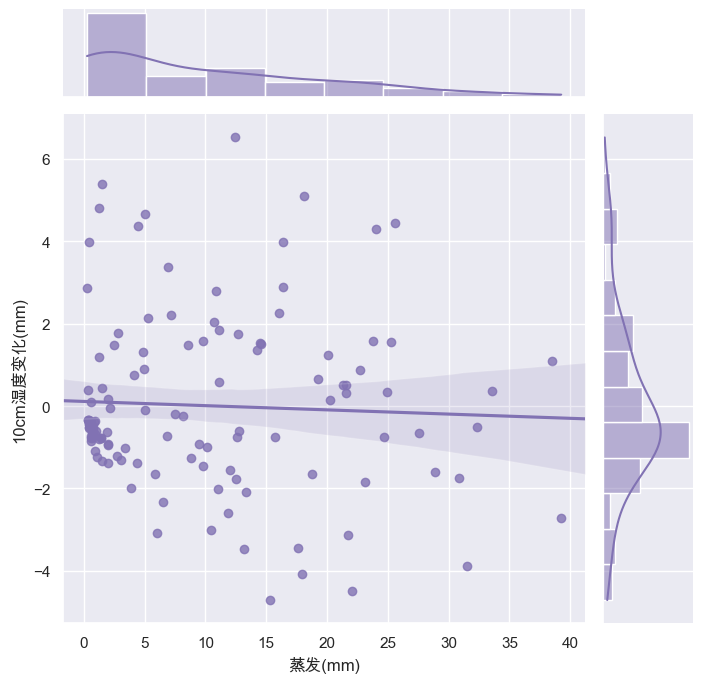

In [101]:

sns.jointplot(x=zhengfa, y=deltashidu10,
                  kind="reg", truncate=False,
                  color="m", height=7)
print(pd.Series(zhengfa).corr(pd.Series(deltashidu10)))
plt.xlabel('蒸发(mm)')
plt.ylabel('10cm湿度变化(mm)')

In [115]:
x=[[jiangshui[i],zhengfa[i]] for i in range(122)]
y=deltashidu10

In [117]:
len(x)

122

In [118]:
## 第一个回归模型
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.880
Date:                Sun, 09 Oct 2022   Prob (F-statistic):              0.157
Time:                        13:39:02   Log-Likelihood:                -261.32
No. Observations:                 122   AIC:                             528.6
Df Residuals:                     119   BIC:                             537.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8581      0.482      1.779      0.0

Text(0, 0.5, '板结化指数B')

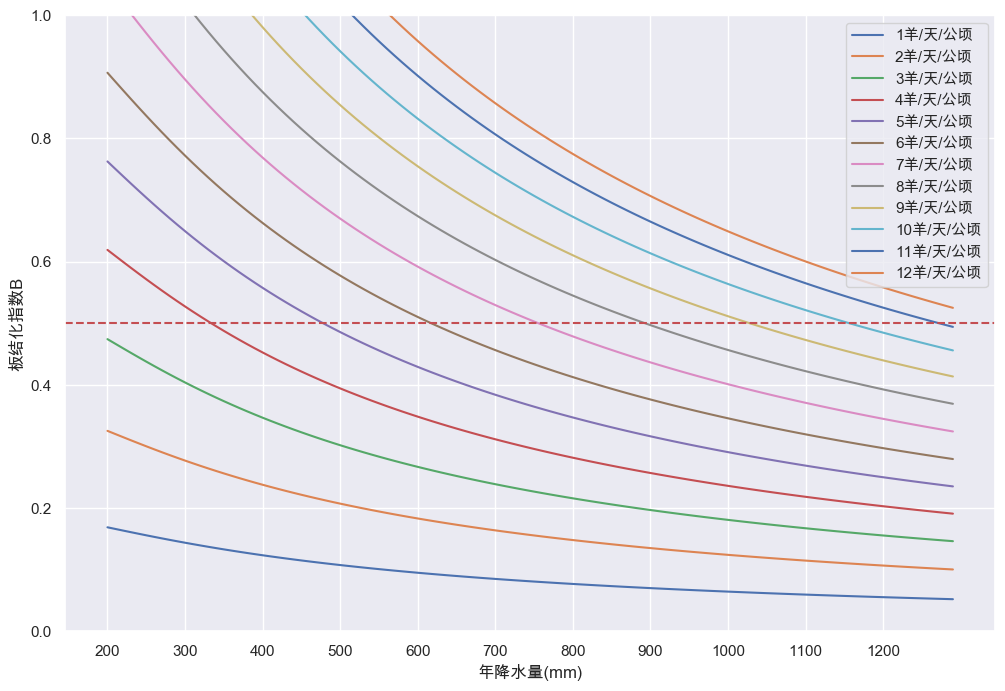

In [236]:
from matplotlib.pyplot import legend

plt.figure(figsize=(12,8))
w=list(range(200,1300,10))
for s in range(1,13):
    def f(x):
        res=2.38*(1-math.exp(-400/x))*0.023*s*(20-s)
        res=res/(4*math.pow(2.7,-s*s/128)+1.36)
        return res
    plt.plot(w,[f(i) for i in w],label=str(s)+'羊/天/公顷')
    plt.ylim((0,1))
plt.legend()

plt.axhline(y=0.5, color='r', linestyle='--')
plt.xticks(list(range(200,1300,100)))
plt.xlabel('年降水量(mm)')
plt.ylabel('板结化指数B')